In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [8]:
df_l = pd.read_csv("n_learn_evaluting_Standard.txt", sep=';')

In [9]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.147607,0,0.085404,0
1,0,1,0.017557,0,0.046416,0
2,0,2,0.009320,0,0.038150,0
3,0,3,0.007899,0,0.042536,0
4,0,4,0.009997,0,0.049369,0


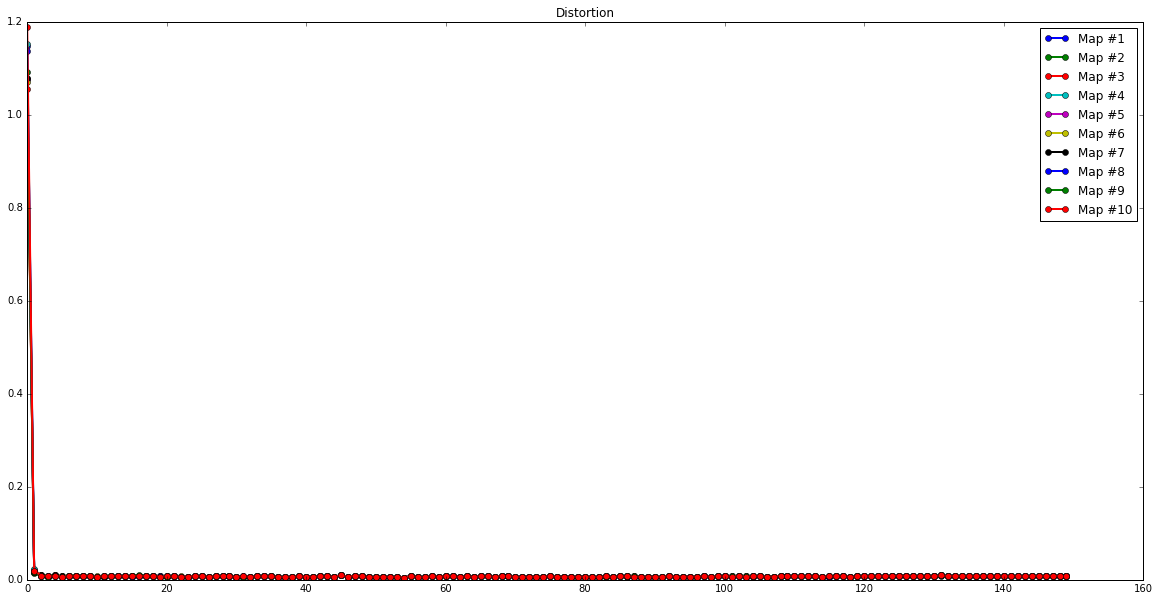

In [10]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
#     plt.xlim([])
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

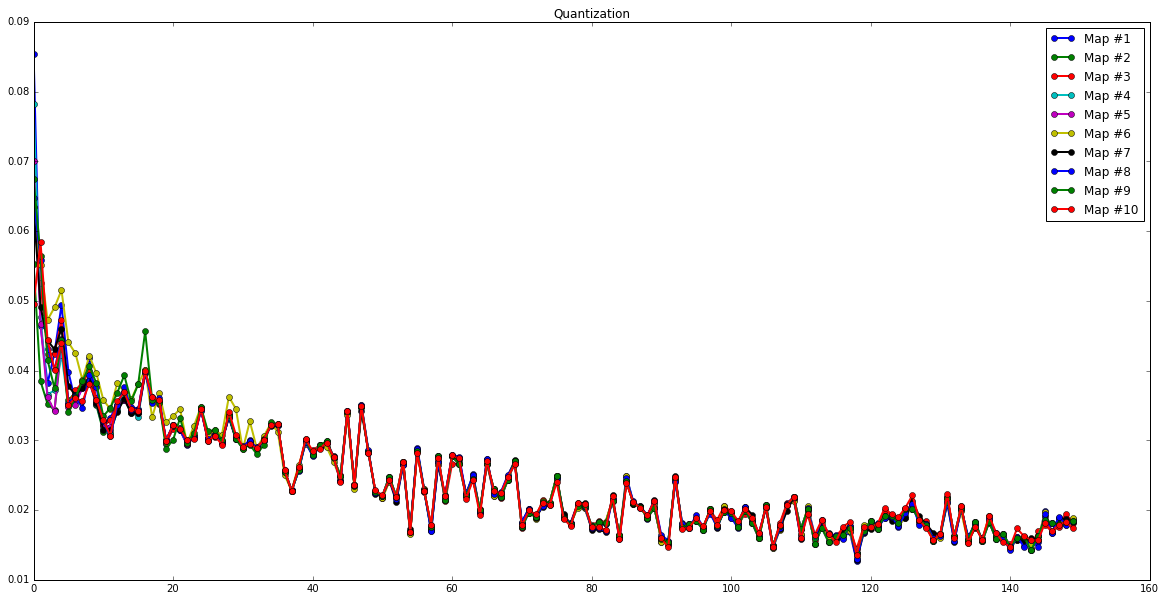

In [12]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [14]:
df_v = pd.read_csv("n_valid_evaluting_Standard.txt", sep=';')
df_v.head(10)

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.114423,0,0.070553,0
1,0,1,0.019861,0,0.044565,0
2,0,2,0.011475,0,0.040395,0
3,0,3,0.010381,0,0.050935,0
4,0,4,0.009794,0,0.044284,0
5,0,5,0.008583,0,0.041917,0
6,0,6,0.008951,0,0.038676,0
7,0,7,0.008361,0,0.040151,0
8,0,8,0.007915,0,0.035091,0
9,0,9,0.008266,0,0.036776,0


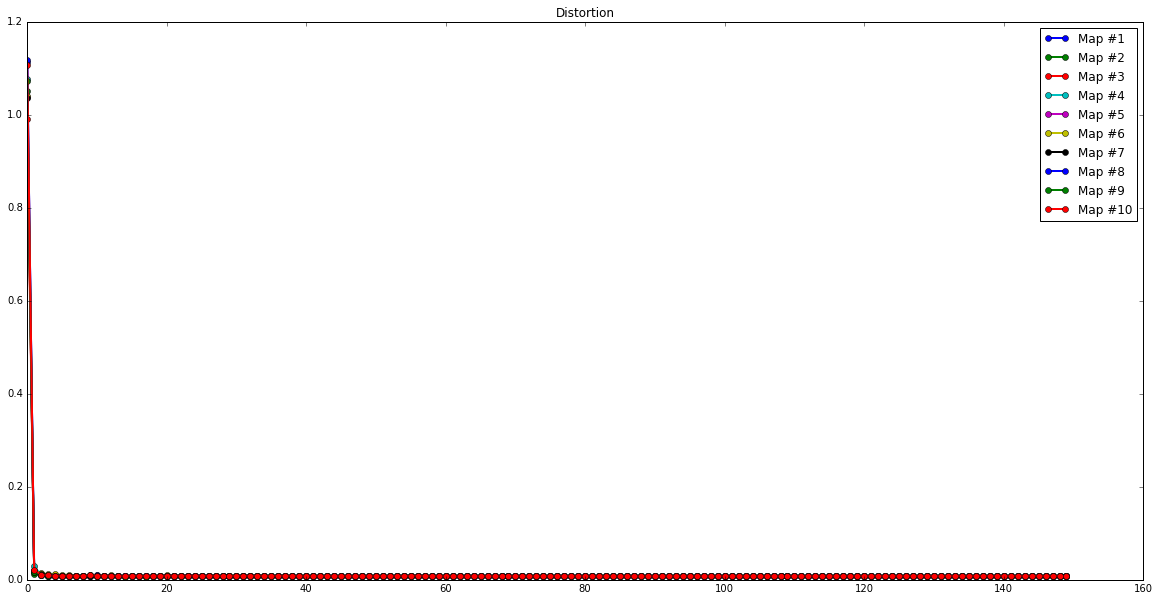

In [23]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    #plt.xlim([-1, 10])
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

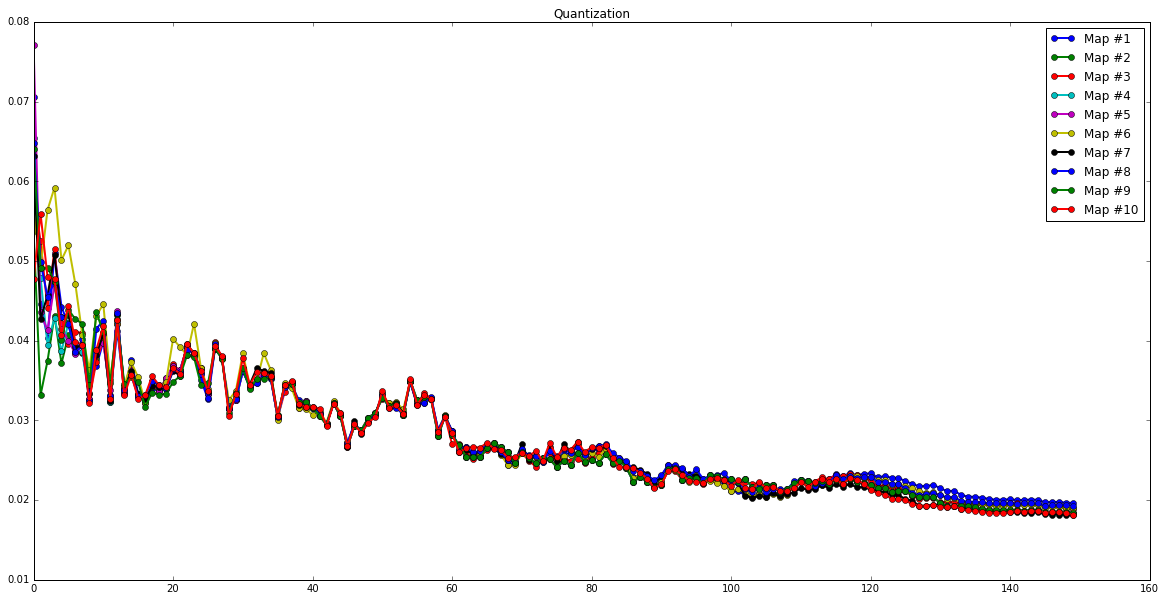

In [17]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [19]:
df_s = pd.read_csv("n_statistics_Standard.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.017939,0,0.160239,0,0.008041,0,944.258984,0,0.000397,0,0.049095,0,0.00005,0,119.470985,0
4526,150,26,0.017939,0,0.175714,0,0.008041,0,990.223522,0,0.000397,0,0.054445,0,0.00005,0,139.868546,0
4527,150,27,0.017939,0,0.192930,0,0.008041,0,1043.670760,0,0.000397,0,0.070577,0,0.00005,0,137.271820,0
4528,150,28,0.017939,0,0.215583,0,0.008041,0,1103.744118,0,0.000397,0,0.094975,0,0.00005,0,152.826813,0
4529,150,29,0.017939,0,0.243404,0,0.008041,0,1155.586864,0,0.000397,0,0.115797,0,0.00005,0,166.736496,0


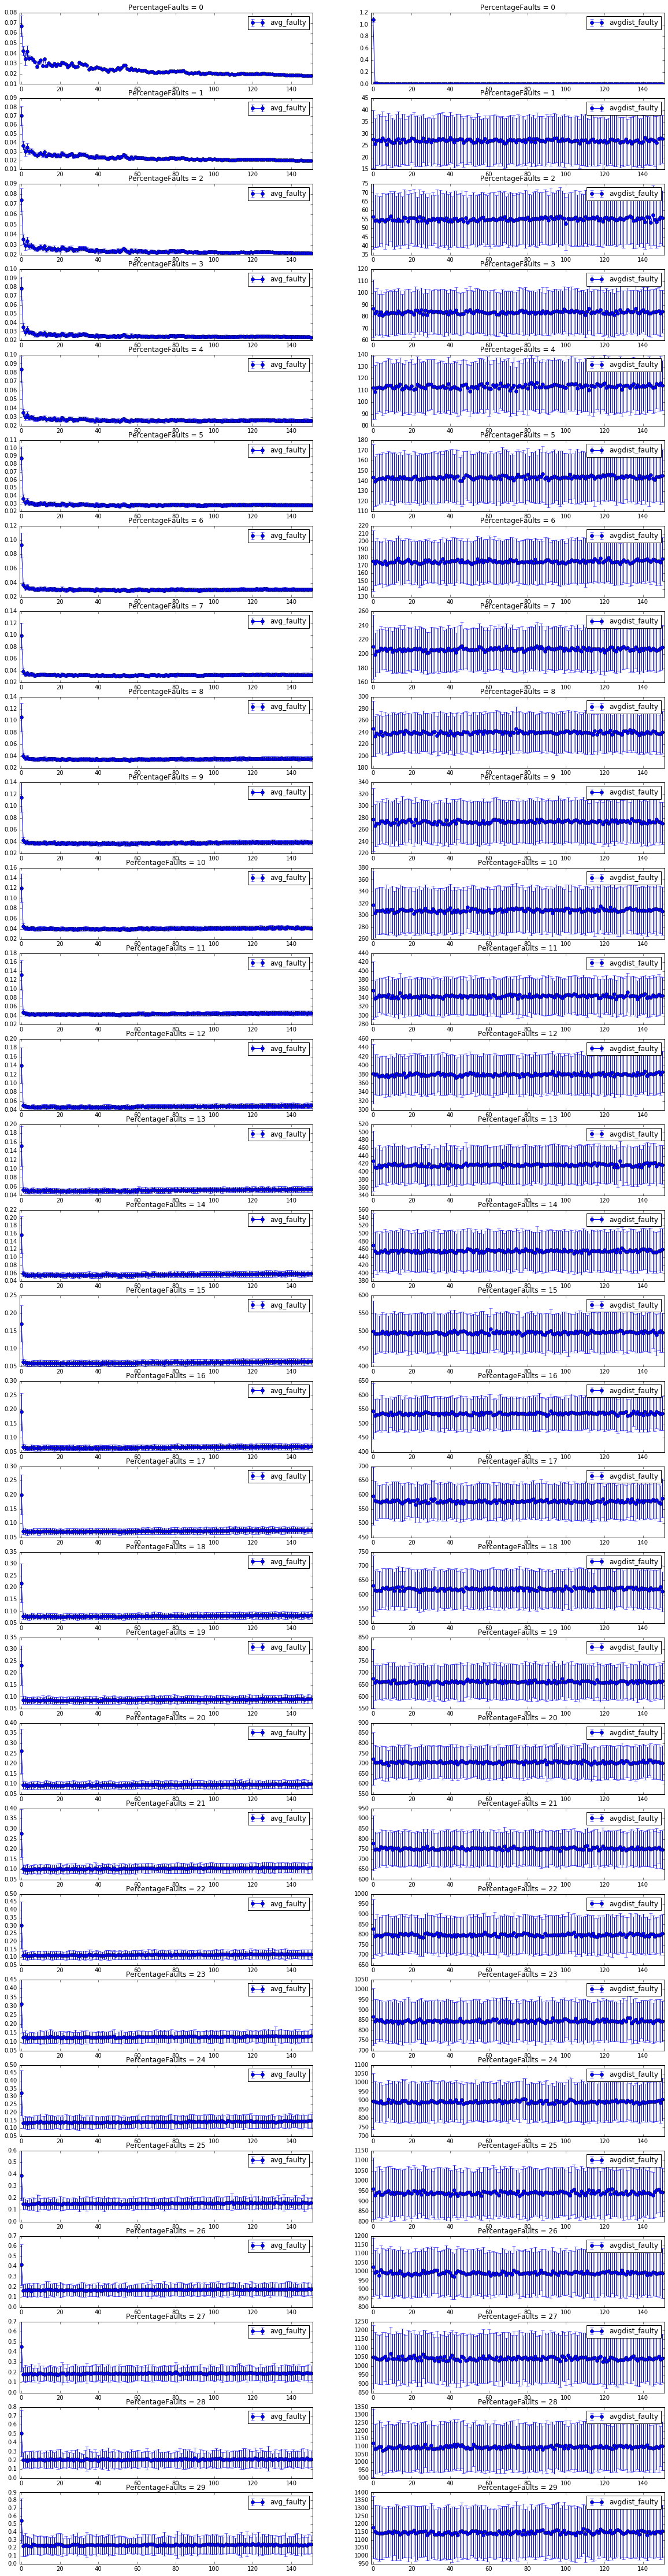

In [26]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1